In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import glob

In [2]:
print('Current working directory: ',os.getcwd())

Current working directory:  C:\Users\Shimul\Documents\Building CSE 4000 Thesis


## Dataset path location using glob

In [3]:
building_house=glob.glob('dataset_building/building_house/*.*')
mosque=glob.glob('dataset_building/mosque/*.*')
temple=glob.glob('dataset_building/temple/*.*')
tinshed=glob.glob('dataset_building/tinshed/*.*')
sky_building=glob.glob('dataset_building/sky_building/*.*')
mud_house=glob.glob('dataset_building/mud_house/*.*')

In [4]:
print('Building house data : ',len(building_house))
print('Mosque data: ',len(mosque))
print('Temple data: ',len(temple))
print('Tinshed data: ',len(tinshed))
print('Sky building data: ',len(sky_building))
print('Mud house data: ',len(mud_house))

Building house data :  250
Mosque data:  250
Temple data:  250
Tinshed data:  250
Sky building data:  250
Mud house data:  250


In [5]:
dataset_classes=[building_house,mosque,temple,tinshed,sky_building,mud_house]
total_class=len(dataset_classes)
print('Total dataset class: ',total_class)

Total dataset class:  6


## Dataset Preprocessing using ImageDataGenerator

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
WIDTH=224
HEIGHT=224

In [8]:
train_generator = ImageDataGenerator(rescale=1./255,
                                    horizontal_flip=True,
                                    #shear_range=0.1 ,
                                    #zoom_range=0.1,
                                    #rotation_range=30,
                                    #height_shift_range=0.1,
                                    fill_mode='nearest')
                                     
validation_generator=ImageDataGenerator(rescale=1./255)

train_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory='dataset_building/train',
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT),
                                                 class_mode='categorical')

validation_dataset = validation_generator.flow_from_directory(batch_size=32,
                                                 directory='dataset_building/test',
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical')

Found 1500 images belonging to 6 classes.
Found 300 images belonging to 6 classes.


In [9]:
train_dataset.class_indices

{'building_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'sky_building': 3,
 'temple': 4,
 'tinshed': 5}

In [10]:
validation_dataset.class_indices

{'building_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'sky_building': 3,
 'temple': 4,
 'tinshed': 5}

In [11]:
total_class=len(train_dataset.class_indices)
print('Number of classes in dataset: ',total_class)

Number of classes in dataset:  6


## Plot some random image
- class 0: building house
- class 1: mosque
- class 2: mud house
- class 3: sky building
- class 4: temple
- class 5: tinshed

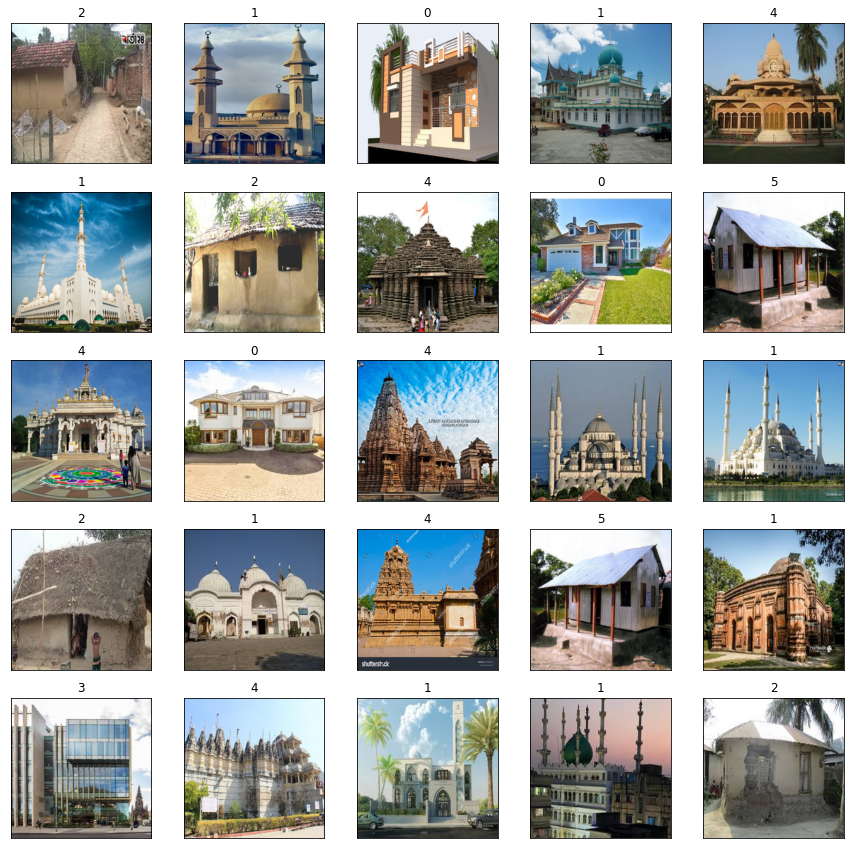

In [12]:
x,y=train_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

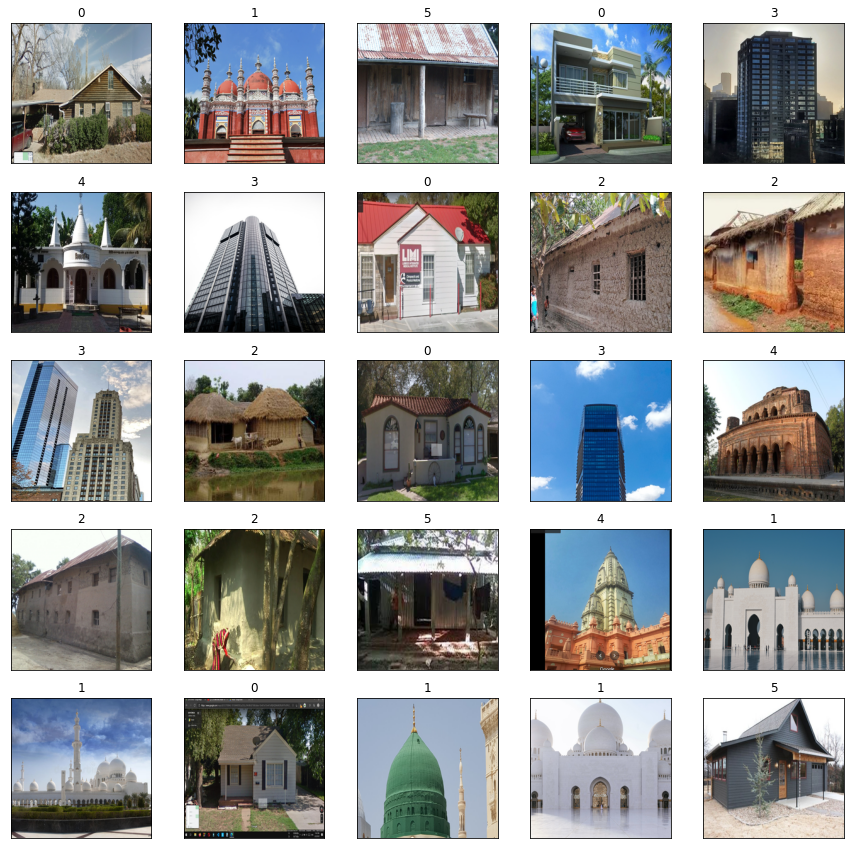

In [13]:
x,y=validation_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

## Import DenseNet

In [14]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
import tensorflow as tf

In [15]:
base_model=InceptionV3(input_shape=(224,224,3),include_top=False)

87916544/87910968 [==============================] - 84s 1us/step


In [16]:
base_model.trainable = False

In [17]:
total_class

6

In [18]:
model = tf.keras.Sequential([
  base_model,
  layers.GlobalAveragePooling2D(),
  layers.Dense(total_class,activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 12294     
Total params: 21,815,078
Trainable params: 12,294
Non-trainable params: 21,802,784
_________________________________________________________________


In [19]:
#base_model.summary()

## Compile the model

In [20]:
model.compile( loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Trained the model

In [21]:
epochs=10
batch_size=32
trainset_length=len(train_dataset.labels)
validation_length=len(validation_dataset.labels)
steps_per_epoch=(trainset_length//batch_size)
validation_steps=(validation_length//batch_size)
print(trainset_length)
print(validation_length)
print(steps_per_epoch)
print(validation_steps)

1500
300
46
9


In [22]:
history = model.fit(train_dataset,
                    steps_per_epoch = steps_per_epoch,
                    epochs=epochs,
                    validation_data=validation_dataset,
                    validation_steps=validation_steps)

Epoch 1/10
46/46 [==============================] - 84s 2s/step - loss: 0.6606 - accuracy: 0.7711 - val_loss: 0.3297 - val_accuracy: 0.8611
Epoch 2/10
46/46 [==============================] - 83s 2s/step - loss: 0.2820 - accuracy: 0.8999 - val_loss: 0.2107 - val_accuracy: 0.9167
Epoch 3/10
46/46 [==============================] - 86s 2s/step - loss: 0.2072 - accuracy: 0.9285 - val_loss: 0.2063 - val_accuracy: 0.9271
Epoch 4/10
46/46 [==============================] - 85s 2s/step - loss: 0.1732 - accuracy: 0.9462 - val_loss: 0.1605 - val_accuracy: 0.9375
Epoch 5/10
46/46 [==============================] - 86s 2s/step - loss: 0.1540 - accuracy: 0.9510 - val_loss: 0.1593 - val_accuracy: 0.9306
Epoch 6/10
46/46 [==============================] - 99s 2s/step - loss: 0.1321 - accuracy: 0.9564 - val_loss: 0.1136 - val_accuracy: 0.9792
Epoch 7/10
46/46 [==============================] - 92s 2s/step - loss: 0.1157 - accuracy: 0.9680 - val_loss: 0.0876 - val_accuracy: 0.9861
Epoch 8/10
46/46 [==

## Plot Accuracy and Loss Graph

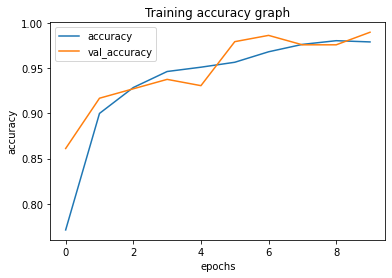

In [23]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

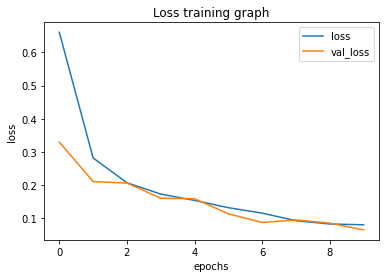

In [24]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

## Softmax activation fuction

three class labels will be integer encoded as 0, 1, and 2. Then encoded to vectors as follows:

- Class 0: [1, 0, 0]
- Class 1: [0, 1, 0]
- Class 2: [0, 0, 1]

The softmax output might look as follows, which puts the most weight on class 1 and less weight on the other classes.

[0.09003057 0.66524096 0.24472847] -> [0,1,0]

<b>equaltion</b> e^z/sum (e^z1,...,e^zn)

## Adam optimzer

Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

According to Kingma et al., 2014, the method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters".

## Testing data using test set

In [25]:
test_loss,test_accuracy=model.evaluate(validation_dataset)
print('Test Loss: ',test_loss)
print('Test Accuracy: ',test_accuracy)

10/10 [==============================] - 15s 2s/step - loss: 0.0680 - accuracy: 0.9867
Test Loss:  0.06796625256538391
Test Accuracy:  0.9866666793823242


In [26]:
print('Accuracy of the model is : ',test_accuracy*100)

Accuracy of the model is :  98.66666793823242


## Evaluate the model using test image
- class 0: building house
- class 1: mosque
- class 2: mud house
- class 3: sky building
- class 4: temple
- class 5: tinshed

In [27]:
from tensorflow.keras.preprocessing import image

(1, 224, 224, 3)
[[0. 0. 0. 0. 0. 0.]]
0


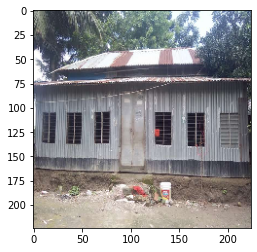

In [28]:
random_image=image.load_img('tinshed19.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[0. 0. 0. 0. 0. 0.]]
0


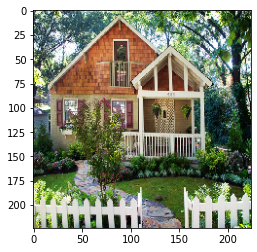

In [29]:
random_image=image.load_img('building0.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[0. 0. 0. 0. 0. 0.]]
0


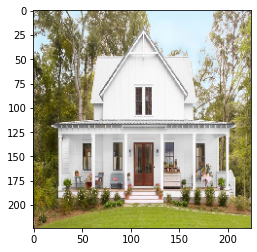

In [30]:
random_image=image.load_img('building1.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[0. 0. 0. 0. 0. 0.]]
0


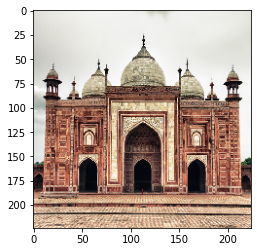

In [31]:
random_image=image.load_img('mosque35.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
print(np.argmax(predicted_class))

## Save Model h5 format
This file includes
- Model architecture
- Model weight values during training
- model training config 
- optimizer 

In [32]:
import time
t = time.time()

export_path_keras = "Saved Model/InceptionV3_{}_model_{}.h5".format(test_accuracy,int(t))
print(export_path_keras)
model.save(export_path_keras)

Saved Model/InceptionV3_0.9866666793823242_model_1617456782.h5


## Reload the model h5 format

In [33]:
from tensorflow.keras.models import load_model

In [34]:
model_path='Saved Model/InceptionV3_0.9666666388511658_model_1617375891.h5'
reload_model=load_model(model_path)
reload_model.summary()


OSError: SavedModel file does not exist at: Saved Model/InceptionV3_0.9666666388511658_model_1617375891.h5/{saved_model.pbtxt|saved_model.pb}

## Experiment with reload model h5 format

In [ ]:
print(len(reload_model.weights))
print(reload_model.output_shape)

## Export as SavedModel
 SavedModel is a standalone serialization format for Tensorflow objects, supported by TensorFlow serving as well as TensorFlow implementations other than Python. A SavedModel contains a complete TensorFlow program, including weights and computation. It does not require the original model building code to run, which makes it useful for sharing or deploying (with TFLite, TensorFlow.js, TensorFlow Serving, or TFHub)
- A TensorFlow checkpoint containing the model weights
- Model architecture config

In [ ]:
t = time.time()

export_path_sm = "Saved Model/TL InceptionV3 {} Model {}".format(test_accuracy,int(t))
print(export_path_sm)

tf.saved_model.save(model, export_path_sm)

## Load SavedModel

In [ ]:
reload_tf_saved_model=tf.saved_model.load(export_path_sm)

In [ ]:
reload_tf_saved_model.signatures['serving_default']

In [ ]:
reload_tf_saved_model